# Teoría Importante

- Cuando tengo un modelo categórico, analizo los resultados con una matriz de confusión.
- Cuando tengo un modelo de regresión, uso mean absolute error !!!

# Código

## Funciones/código útil

Borrar columnas nulas

In [ ]:
col_null = [col for col in X_train.columns if X_train[col].isnull().any()]

In [ ]:
X_train_nuevo = X_train.drop(col_null,axis=1)

Separar data por tipo

In [ ]:
X = X.select_dtypes(exclude=['object'])

Aumentar las filas

In [ ]:
pd.set_option('display.max_rows', 21807)

Separar entrada de la salida

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

label encode, para convertir de letras a números

In [ ]:
X = df2.values
y = df['diagnosis']

In [ ]:
lbe = LabelEncoder()
y = lbe.fit_transform(y)

##Fechas

In [ ]:
df['date']= pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda date:date.month)
df['year']=df['date'].apply(lambda date:date.year)

## Librerías

In [ ]:
import pandas as pd #dataframe
import seaborn as sns #graficos
import matplotlib.pyplot as plt #graficos
import missingno as msno

from sklearn.metrics import roc_curve #curvas roc
from sklearn.metrics import roc_auc_score #curvas roc
from matplotlib import pyplot #dibujar curva roc

from sklearn.model_selection import train_test_split #partir en test
from sklearn.preprocessing import MinMaxScaler #para escalar?
from tensorflow.keras.models import Sequential #para la red neuronal
from tensorflow.keras.layers import Dense #para la red neuronal
from sklearn.metrics import mean_absolute_error #para el error absoluto #USAR PARA VER PRECISIÓN DE LOS MODELOS DE REGRESIÓN

#librerias de balanceo
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

#para el pca
from sklearn.decomposition import PCA

import io
import glob
import os
import csv

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [ ]:
df.head() #para ver el principio de los datos 

In [ ]:
df.tail() #para ver el final de los datos

In [ ]:
df.isnull().sum() #para sumar los nulos

##Modelo de regresión error medio cuadrático

El error medio cuadrático debe fluctuar un 10% de la media de mi variable y para saber si está bien predicho

##Escalado

Escalado: cuando hay varios tipos de datos en el dataframe.

Y cuando el máx y el minimo del .info() es muy exagerado

Si hago pca ya no hago escalado 

In [ ]:
df.info() #para saber si debo aplicar escalonado


In [ ]:
df.describe().transpose()

Se hace antes de armar la red. Solo en el X


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 20)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Después armar la red

In [ ]:
def trainTestSplit(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

def escalado(X_train,X_test):
  sc = StandardScaler()
  sc.fit(X_train)
  return sc.transform(X_train),sc.transform(X_test)

def generarPCA(n_componentes,X):
  pca = PCA(n_components=n_componentes)
  cp = pca.fit_transform(X)
  return pd.DataFrame(data=cp)

##PCA

- Hay que tratar de que los datos no estén muy dispersos
- Si los datos están muy dispersos, toca aplicar técnicas de análisis de datos: (eliminar variables, reducir variables, etc)

Si tengo estas dos situaciones juntas, va a ser dificil que yo pueda aplicar un modelo de aprendizaje de máquina

Sirve para reducir la dimensionalidad

**Condiciones**

Si tengo muchas variables, debo aplicar un pca. En ese caso puedo no borrar las variables dependientes.

Desviación estándar muy alta.

Variables muy dependientes entre sí.

Valores máximos y mínimos sumamente elevados.

Diferentes tipos de variables.

Ejemplo uso del pca

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X),y_aux)

Después armar la red

##Cuartiles

Se los ve cuando se hace data.describe().

Me indican que valores hay al 25%, 50% y 75%

Me pueden servir para categorizar a mi variable cuando no mismo puedo entrenar. Me sale un error demasiado grande

Si en cada cuartil tengo la misma cantidad, entonces, no me sirve mucho esa variable.

##Pearson

df.describe().transpose()
1. Veo si tiene una desviación estándar alta
2. Si tiene, veo con pearson cómo le afecta (positiva o negativamente) a mi variable objetivo.

Si le afecta me sirve, sino no.

También puedo ver si se relaciona la una con la otra.


Ver la relación que tenga con las demás variables

In [ ]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(df.corr(), vmax= 0.85, square=True, cmap='GnBu',linecolor='b',annot=True, annot_kws={"size":9})
#para que salga sin número poner annot = False

##Si tengo variables dependientes
quedate con una y borra las demas. O trabájales

##Nulos

##Redes Neuronales


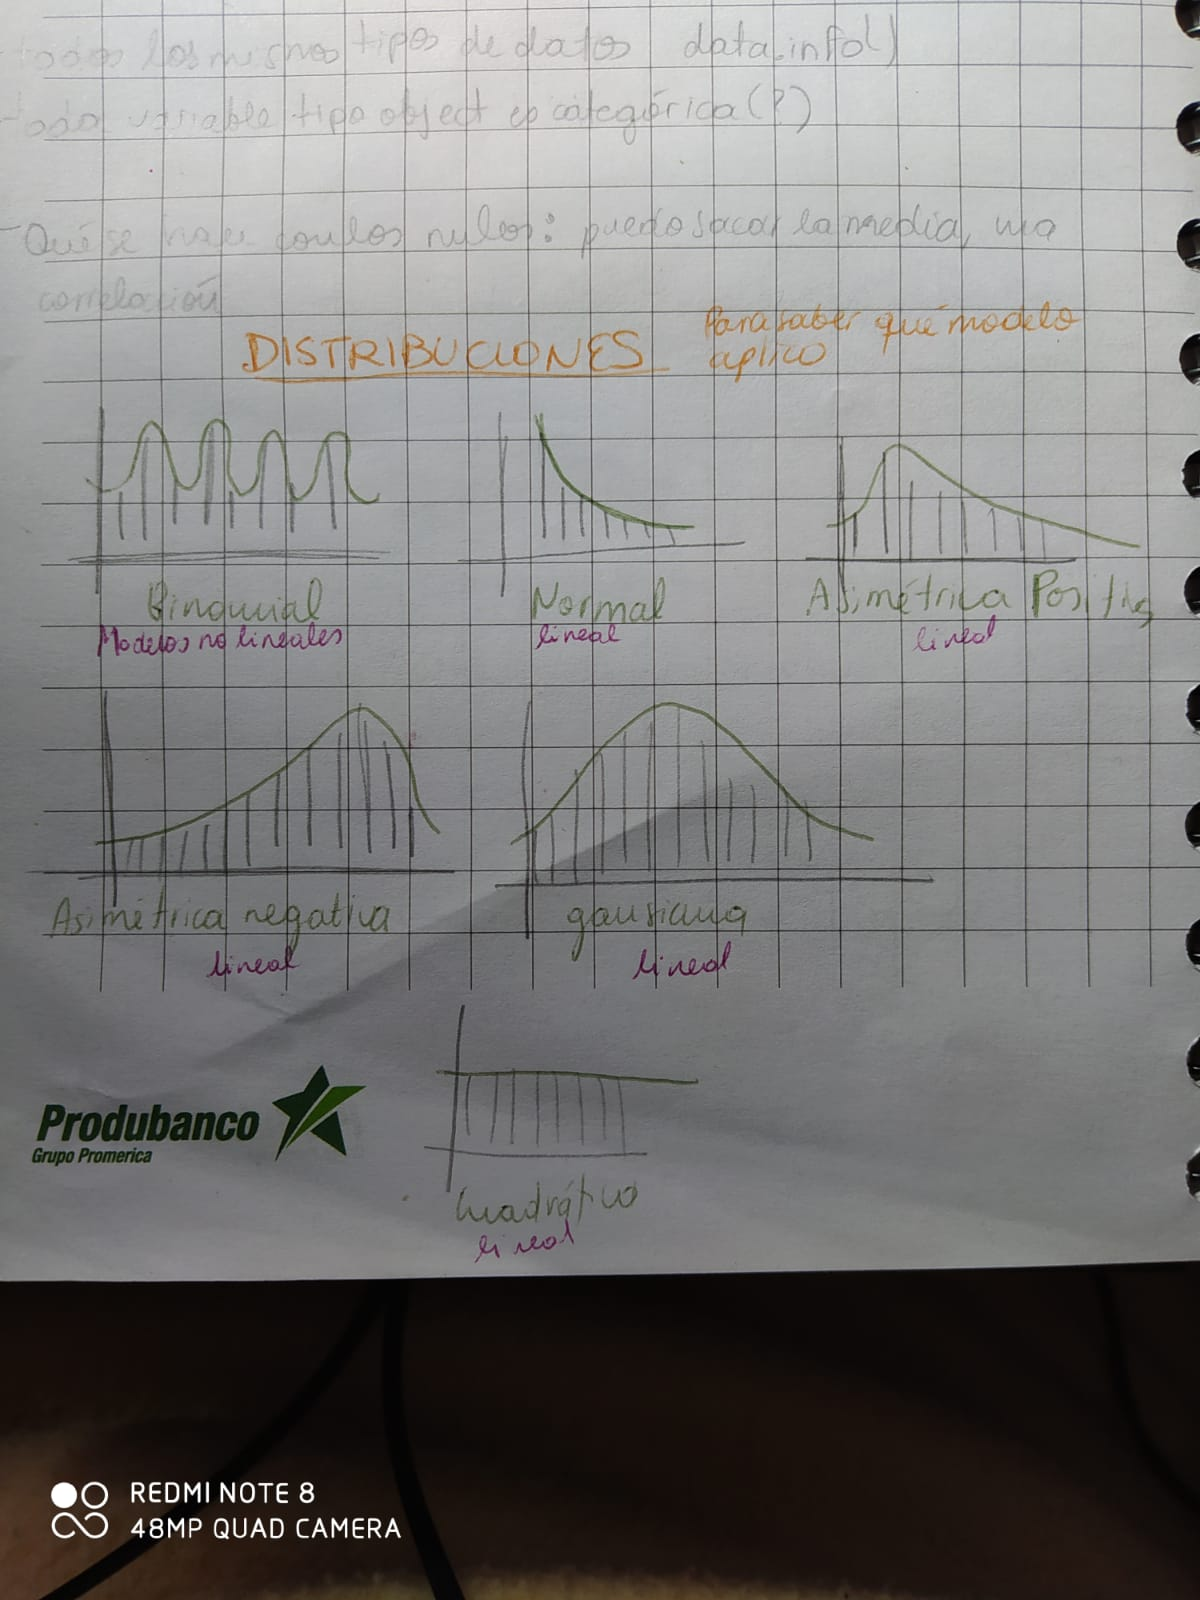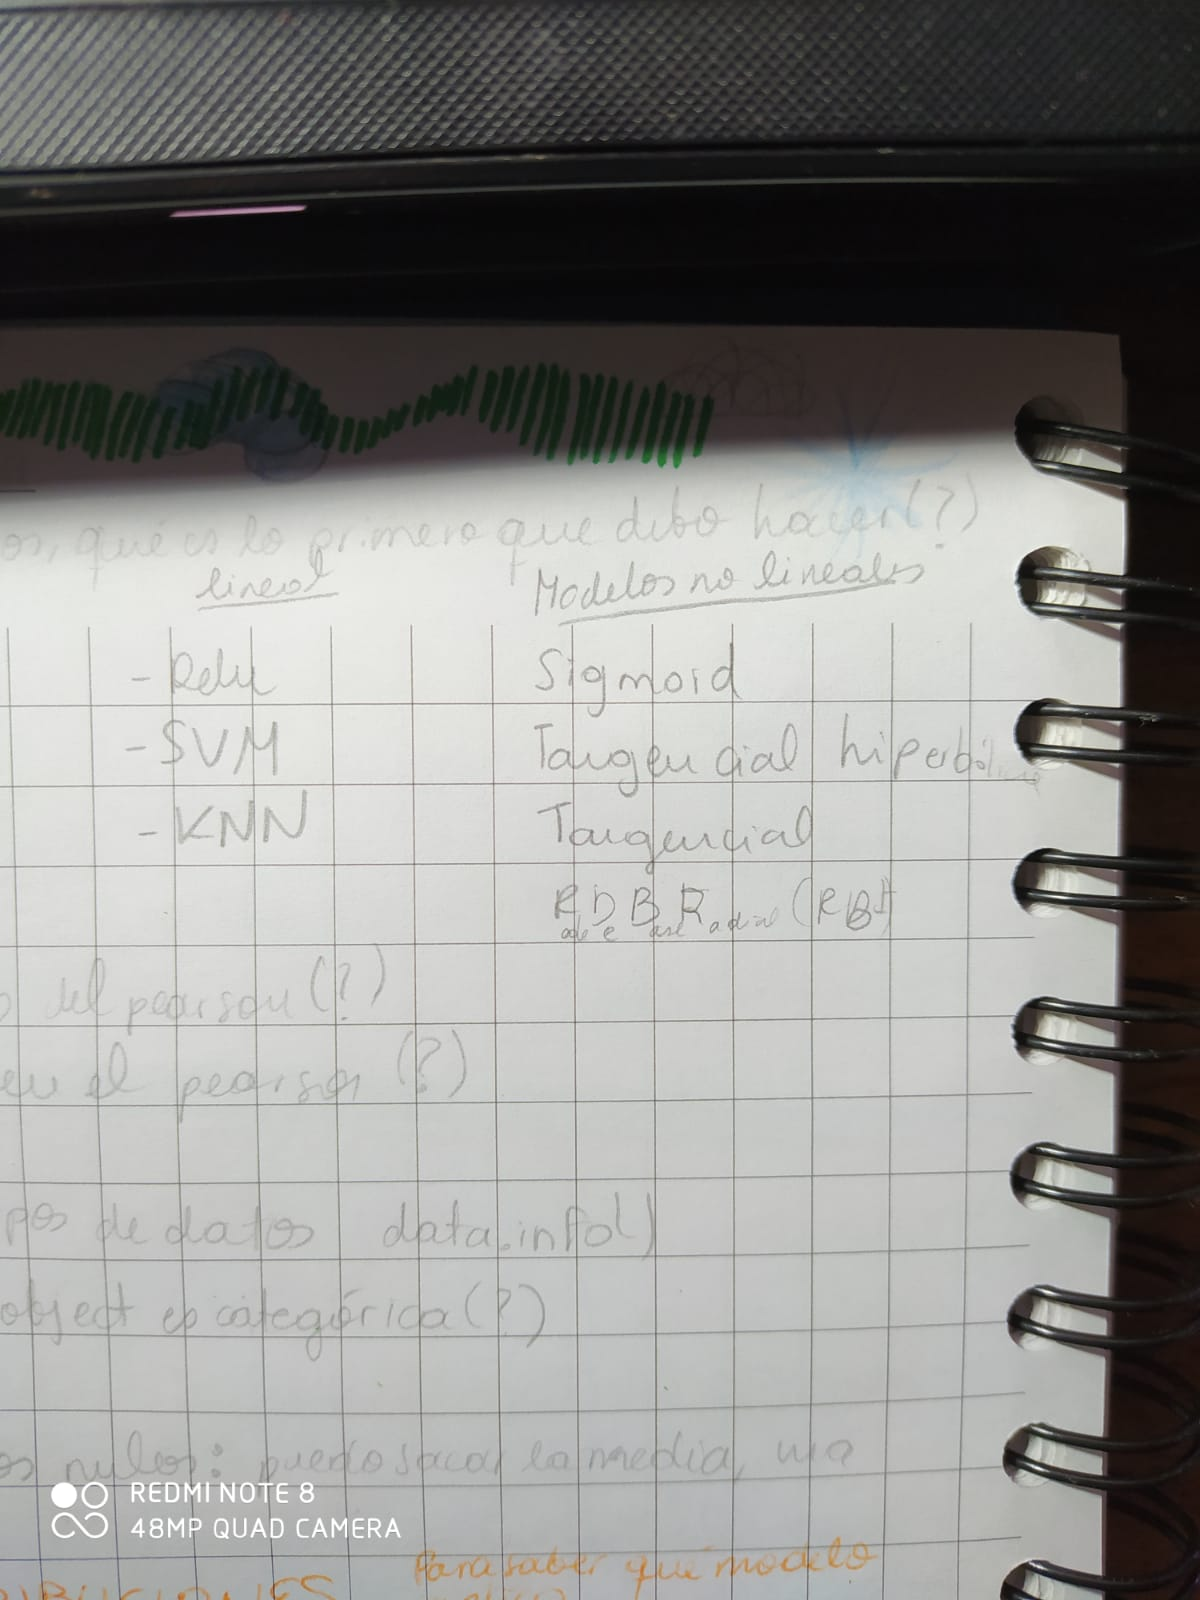

- Si hay más lineales y una no lineal o pocas no lineales, entonces solo aplicar para las lineales

- Si tengo varias no lineales, y pocas lineales. Entonces, en la primera capa puedo aplicar para las lineales y despues para las no lineales

¿Cuántas capas uso?

Depende de los tipos de distribuciones que tenga: lineales o no lineales

Para la última capa, aplico lo mismo de la antepenúltima y el número de neuronas depende del número de variables y que tenga.

¿Cuántas neuronas uso?

X-1 antes del numpy

###Red neuronal para modelo de regresión

In [ ]:
#divido en datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 20)

In [ ]:
#escalado
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#armo la red neuronal
model = Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(1))#depende de las variables

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=150,epochs=350,verbose=1)
#batch_size = número de individuos que voy mandando en cada época

In [ ]:
#dibujo la pérdida
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
sns.despine()

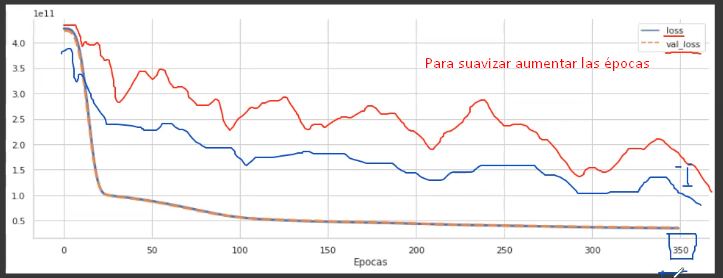

###Red neuronal para modelo categórico

In [ ]:
X_train,,y_train,y_test = trainTestSplit(generarPCA(2,X_rus),y_rus)

In [ ]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy 
#categorical_crossentropy: más de dos categorías

In [ ]:
#bach size dibujar hasta 50
#batch suaviza la curva
#batch de 50 en 50 ajusta el peso
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

In [ ]:
#para dibujar la pérdida
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

###Analizar precisión del modelo de regresión

In [ ]:
prediccion = model.predict(X_test)
print(mean_absolute_error(y_test,prediccion)) #que tan bien predice mi modelo

In [ ]:
#tomo un ejemplo para ver si esta prediciendo
casa1 = df.drop('price',axis=1).iloc[0]
print('Valor Real: ',df.iloc[0]['price'])
print('Valor Prediccion: ',model.predict(scaler.transform(casa1.values.reshape(-1,19)))[0,0])

También pueda que esté aprendiendo así porque le ayudó el pca

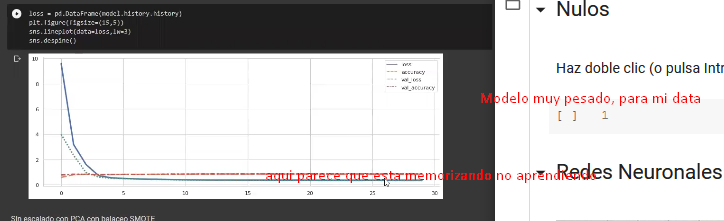

## KNN

Para clasificación

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [ ]:
svc = SVC(kernel="linear",verbose=True) #[linear, poly, sigmoid, rbf]

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
svc.score(X_train,y_train)

In [ ]:
svc.score(X_test,y_test)

In [ ]:
confusion_matrix(y_test,svc.predict(X_test))

##Análisis histogramas


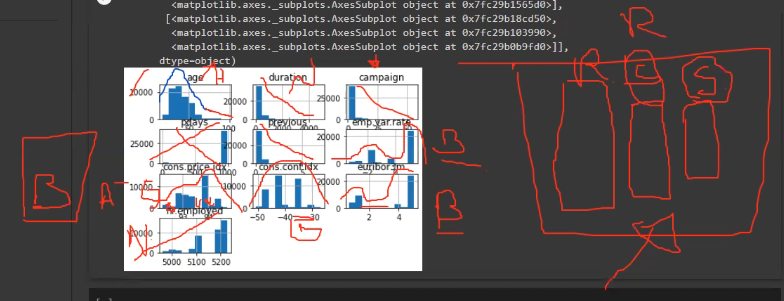

##Separar X de Y y hacer dummies

In [ ]:
x_aux = data.iloc[:,0:20]
x_aux = x_aux.drop(['pdays'],axis=1)
X = pd.get_dummies(x_aux)
y = data.iloc[:,20]

##Balanceo de datos

No se recomienda ni el over, ni el under cuando se tiene mucha cantidad de datos. Porque no genera nuevo conocimiento. Se recomienda el smote

Hay que usar uno de los tres

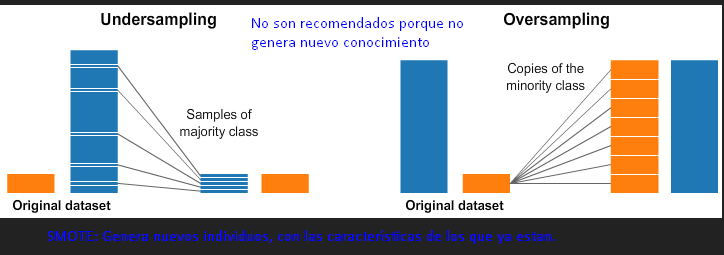![imagen.png](


UnderSampler

In [ ]:
rus = RandomUnderSampler(random_state =0)
X_rus, y_rus = rus.fit_resample(X,y_aux)
pd.Series(y_rus).value_counts()

OverSampler

In [ ]:
ros = RandomOverSampler(random_state =0)
X_ros, y_ros = ros.fit_resample(X,y_aux)
pd.Series(y_ros).value_counts()

Smote

In [ ]:
sm = SMOTE(random_state =0)
X_sm, y_sm = sm.fit_resample(X,y_aux)
pd.Series(y_sm).value_counts()

Puedo hacer esto:
- Balanceo
- PCA
- Armar la red

##Cambiar de letras a números

In [ ]:
#para cambiar los valores de letras a números
lenc = LabelEncoder()
y_aux = lenc.fit_transform(y)

##SVM


In [ ]:
from sklearn.svm import SVC
#regresion svr

In [ ]:
svc = SVC(kernel="linear",verbose=True) #[linear, poly, sigmoid, rbf]

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
svc.score(X_train,y_train)

In [ ]:
svc.score(X_test,y_test)

In [ ]:
confusion_matrix(y_test,svc.predict(X_test))

##Curvas ROC


Sirve para decidir con cual modelo me quedo.

Mientras más se acerque la curva a la parte de la esquina, mejor.

Grafica basándose en la precisión y en el recall

  Precisión: 

In [ ]:
ns_auc = roc_auc_score(testy, ns_probs)#sin entrenar
lr_auc = roc_auc_score(testy, lr_probs)#con la regresion logística

In [ ]:
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

In [ ]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

##KFOLDS

KFold se utiliza para tomar muestras aleatorioas de mi data y usar estas en cada iteración.

Se recomienda utilizar esto cuando no puedo hacer un smote. O cuando tengo un accurancy o un error muy recto, no es una gráfica suave.


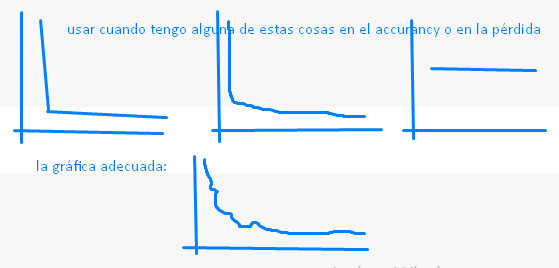  
)

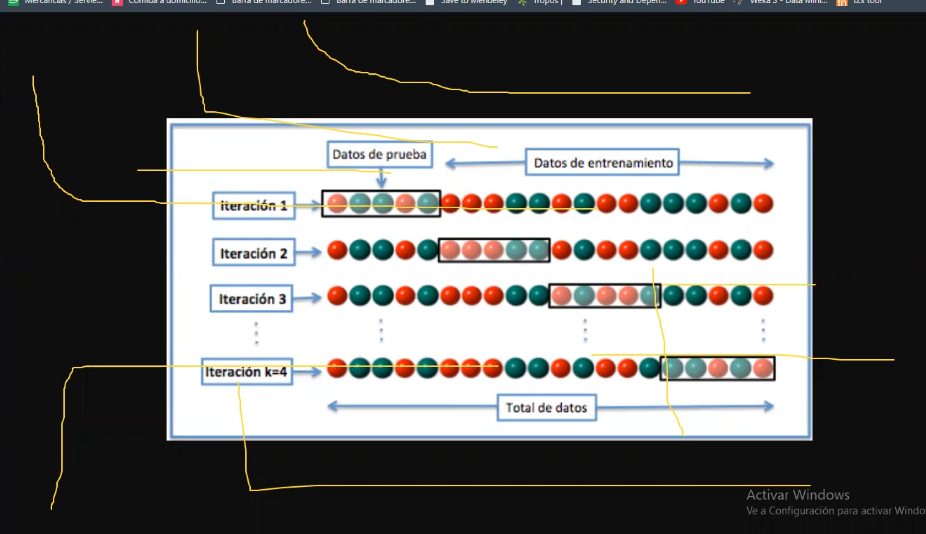

In [ ]:
from sklearn.model_selection import KFold
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
kf = KFold(n_splits=3, shuffle =True)
for train_index, test_index in kf.split(X):
  print("%s %s" % (train_index, test_index))

[ 0  1  3  5  6  8  9 11 12 14] [ 2  4  7 10 13 15]
[ 1  2  4  5  6  7  8 10 13 14 15] [ 0  3  9 11 12]
[ 0  2  3  4  7  9 10 11 12 13 15] [ 1  5  6  8 14]


El siguiente se usa cuando tengo data desbalanceada

In [ ]:
from sklearn.model_selection import StratifiedKFold
X=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y=[0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]
skf = StratifiedKFold(n_splits=2,shuffle=True)
for train_index, test_index in skf.split(X,y):
  print("%s %s" % (train_index, test_index))

[ 0  3  5  6  9 12 13 14] [ 1  2  4  7  8 10 11 15]
[ 1  2  4  7  8 10 11 15] [ 0  3  5  6  9 12 13 14]


In [ ]:
from sklearn.model_selection import GroupKFold
X=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y= [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
groups = ['a','a','a','b','b','b','c','c','c','c','d','d','d','d','d','d']
gkf = GroupKFold(n_splits =4)
for train_index,test_index in gkf.split(X,y,groups=groups):
  print("%s %s"% (train_index, test_index))

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15]
[ 0  1  2  3  4  5 10 11 12 13 14 15] [6 7 8 9]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15] [3 4 5]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15] [0 1 2]


# Gráficos


In [ ]:
#muestra los datos de salida cómo están si están balanceados o desbalanceados
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

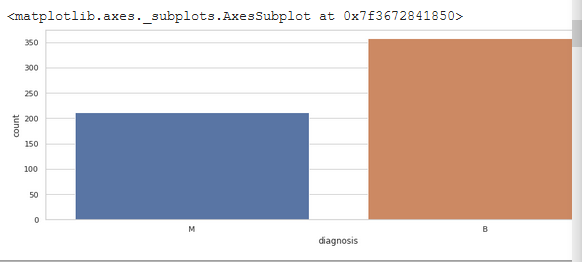

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
b1 = ax[0,0].bar(data1['day_of_week'].unique(),height = data1['day_of_week'].value_counts(),color='#000000')
b2 = ax[0,0].bar(data2['day_of_week'].unique(),height = data2['day_of_week'].value_counts(),bottom = data1['day_of_week'].value_counts(),color='#FF000012')
ax[0,0].title.set_text('day_of_week')

ax[0,1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0,1].bar(data1['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color='#FF000012')
ax[0,1].title.set_text('month')

ax[1,0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1,0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color='#FF000012')
ax[1,0].title.set_text('job')
ax[1,0].tick_params(axis='x',rotation=90)

ax[1,1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000')
ax[1,1].bar(data1['education'].unique(),height = data2['education'].value_counts(),bottom = data1['education'].value_counts(),color='#FF000012')
ax[1,1].title.set_text('education')

plt.figlegend((b1[0],b2[0]),('Yes','No'),loc='right')


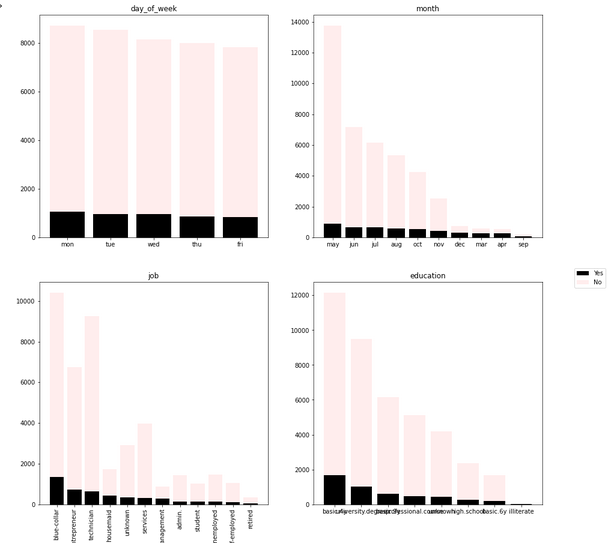

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].hist(data1['age'],color ="#000000",bins=20,alpha=0.8,edgecolor='white')
ax[0,0].hist(data2['age'],color ="#DC4485",bins=20,alpha=0.4,edgecolor='white')
ax[0,0].title.set_text('age')

plt.figlegend((b1[0],b2[0]),('Yes','No'), loc='right')

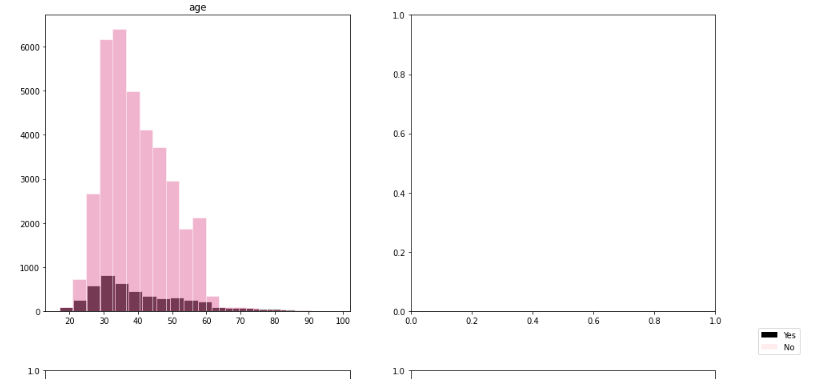